# Домашнее задание №3

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

Таблица Indian liver pations records.

In [2]:
url="http://yustiks.ru/dataset/indian_liver_patient.csv"
data=pd.read_csv(url)
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


Columns:

*  Age of the patient
*  Gender of the patient
*  Total Bilirubin
*  Direct Bilirubin
*  Alkaline Phosphotase
*  Alamine Aminotransferase
*  Aspartate Aminotransferase
*  Total Protiens
*  Albumin
*  Albumin and Globulin Ratio
*  Dataset: field used to split the data into two sets (patient with liver disease, or no disease)


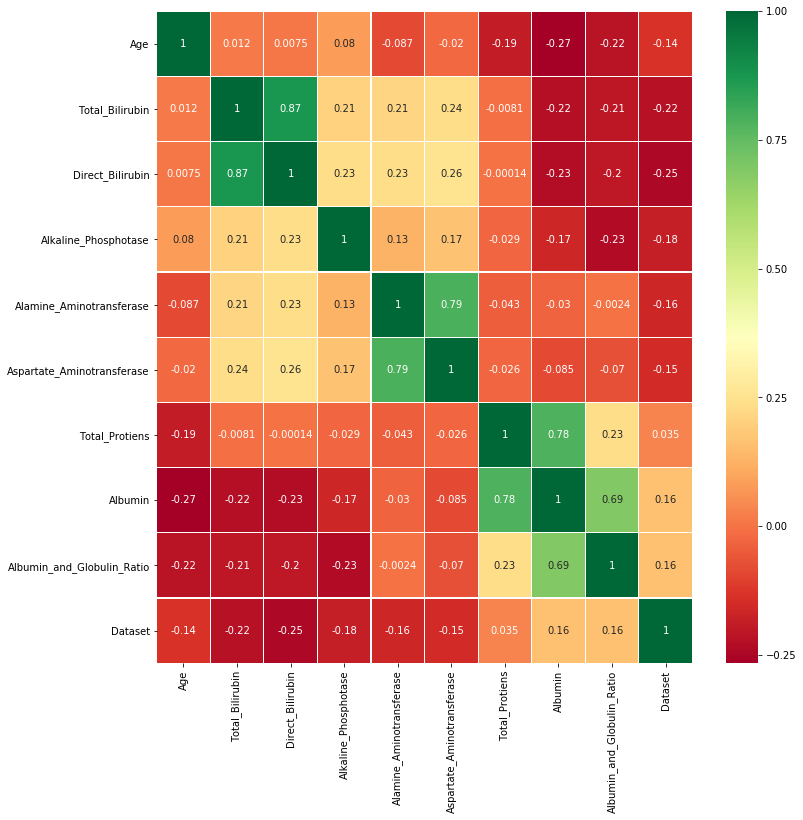

In [3]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

Построить одномерную линейную регрессию Direct_Bilirubin и Total_Bilirubin. Построить график. Строим прямую с помощью уравнения которое мы посчитали. Предсказать несколько элементов из таблицы с помощью метода predict() и сравнить с результатом табличным.

In [4]:
from sklearn.linear_model import LinearRegression
direct_bilirubin = data['Direct_Bilirubin']
total_bilirubin = data['Total_Bilirubin']
model = LinearRegression()
result = model.fit(np.array(total_bilirubin).reshape(-1,1), direct_bilirubin)

print('intercept:', model.intercept_)

print('slope:', model.coef_)

intercept: 0.18116743679724934
slope: [0.39557996]


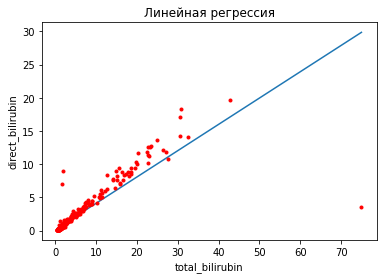

In [5]:
plt.xlabel('total_bilirubin')
plt.ylabel('direct_bilirubin')
plt.title('Линейная регрессия')
x = np.linspace(min(total_bilirubin), max(total_bilirubin), 100)
y = model.coef_*x + model.intercept_
plt.plot(x,y)
plt.plot(total_bilirubin, direct_bilirubin, 'r.')
plt.show()

In [6]:
model.predict(np.array([12]).reshape(-1, 1))

array([4.92812699])

In [7]:
model.predict(np.array([7.3]).reshape(-1, 1))

array([3.06890116])

табличное значение Direct_Bilirubin = 4.1

In [8]:
model.predict(np.array([3.9]).reshape(-1, 1))

array([1.72392929])

табличное значение Direct_Bilirubin = 2.0

Построить многомерную линейную регрессию для предсказания болезни (Dataset) от двух параметров. Параметры подобрать с помощью матрицы корреляций. Предсказать несколько значений из таблицы и сравнить результат модели от табличного значения.

In [9]:
total_bilirubin = data['Total_Bilirubin']
direct_bilirubin = data['Direct_Bilirubin']
dataset = data['Dataset']
x = np.vstack([np.array(total_bilirubin), np.array(direct_bilirubin)]).T
print('x - это двумерная матрица, где колонки - это total_bilirubin и direct_bilirubin : ')
print(x[:3])
y = np.array(dataset)
model = LinearRegression().fit(x, y)

x - это двумерная матрица, где колонки - это total_bilirubin и direct_bilirubin : 
[[ 0.7  0.1]
 [10.9  5.5]
 [ 7.3  4.1]]


In [10]:
print('intercept:', model.intercept_)

print('slope:', model.coef_)

intercept: 1.3460214492954408
slope: [-0.00155356 -0.03663745]


In [11]:
print('Предсказание модели: ', model.predict(x[0:5]))

Предсказание модели:  [1.34127021 1.1275816  1.18446687 1.3298129  1.26668764]


Посчитать квартили для всех колонок. 

In [12]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


Построить график histogram двух выборок по наличию или отсутствию болезни: люди, возрастом до 50 лет, и люди после 50 лет. Посчитать среднее значение и квартиль 0.5 в данных выборках. Чем они отличаются?

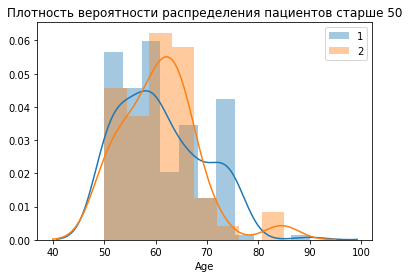

In [13]:
sick_over_50 = data[(data['Dataset'] == 1) & (data['Age'] >= 50)]['Age'] 
helthy_over_50 = data[(data['Dataset'] == 2) &(data['Age'] >= 50)]['Age'] 
sns.distplot(sick_over_50)
sns.distplot(helthy_over_50)
plt.title('Плотность вероятности распределения пациентов старше 50')
plt.legend(['1', '2'])
plt.show()

In [14]:
sick_over_50.mean()

61.02285714285714

In [15]:
sick_over_50.quantile([ .50]) 

0.5    60.0
Name: Age, dtype: float64

In [16]:
helthy_over_50.mean()

60.763636363636365

In [17]:
helthy_over_50.quantile([ .50]) 

0.5    60.0
Name: Age, dtype: float64

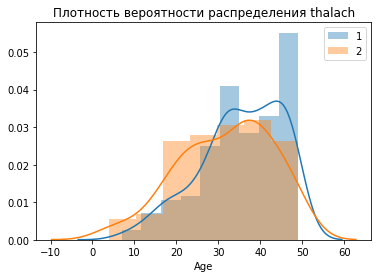

In [18]:
sick_below_50 = data[(data['Dataset'] == 1) & (data['Age'] < 50)]['Age']
helthy_below_50 = data[(data['Dataset'] == 2) &(data['Age'] < 50)]['Age'] 
sns.distplot(sick_below_50)
sns.distplot(helthy_below_50)
plt.title('Плотность вероятности распределения thalach')
plt.legend(['1', '2'])
plt.show()

In [19]:
sick_below_50.mean()

35.356846473029044

In [20]:
sick_below_50.quantile([ .50]) 

0.5    37.0
Name: Age, dtype: float64

In [21]:
helthy_below_50.mean()

31.651785714285715

In [22]:
helthy_below_50.quantile([ .50]) 

0.5    34.0
Name: Age, dtype: float64

Среднее значение и квартиль в данных выборках отличаются возрастом пациентов.

Посчитать критерий одновыборочный t-критерий для выборки по критерию Total_Bilirubin у больных людей. Как показатель помогает понять, что выборки не похожа на генеральную совокупность?

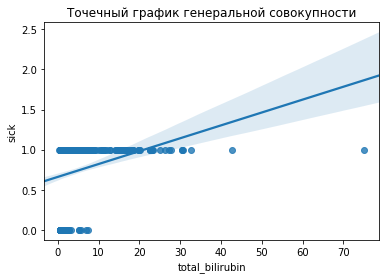

In [23]:
total_bilirubin = data['Total_Bilirubin']
sick = (data['Dataset'] == 1) #dataset = #chol = data['chol']
sns.regplot(x= total_bilirubin, y = sick, data=data, fit_reg=True)
plt.xlabel('total_bilirubin')
plt.ylabel('sick')
plt.title('Точечный график генеральной совокупности')
plt.show()

In [24]:
sick_t = data[data['Dataset']==1]['Total_Bilirubin']
stats.ttest_1samp(sick_t, data['Total_Bilirubin'].mean())

Ttest_1sampResult(statistic=2.471063305746647, pvalue=0.013871861207640042)

T-значение 2,47, и в одновыборочном критерии мы оцениваем p-value.

p-value равно 0.013, что намного меньше стандартной альфа ошибки 0.05, поэтому мы принимаем нулевую гипотезу и можем сказать, что имеется статистическое различие между больными и генеральной совокупности в целом.

Посчитать критерий t для двух выборок: больные и здоровые (по критерию Total_Bilirubin). Имеют ли данные группы схожесть?

In [25]:
sick_t = data[data['Dataset']==1]['Total_Bilirubin']

healthy_t = data[data['Dataset']==2]['Total_Bilirubin']

stats.ttest_ind(sick_t, healthy_t)

Ttest_indResult(statistic=5.441441126834863, pvalue=7.801430929364345e-08)

T-значение 5.44, p-value равно 0.32, что намного меньше стандартной альфа ошибки 0.05, поэтому мы не принимаем нулевую гипотезу и можем сказать, что имеется статистическое различие между Total_Bilirubin у здовровых и больных пациентов в целом.

Посчитать статистическую значимость для трех выборок (по возрасту) - 1ая группа от 1 до 30 лет, 2ая группа от 30 лет до 55, 3я группа более 55 по выборке Dataset. Сравнить с реальностью (они логично что будут отличаться).

In [29]:
sick_below_30 = data[(data['Dataset'] == 1) & (data['Age'] < 30)]['Age']
helthy_below_30 = data[(data['Dataset'] == 2) &(data['Age'] < 30)]['Age']
# >= 50)
sick_between_31_50 = data[(data['Dataset'] == 1) & ((data['Age'] >= 30) & (data['Age'] < 50))]['Age']
helthy_between_31_50 = data[(data['Dataset'] == 2) & ((data['Age'] >= 30) & (data['Age'] < 50))]['Age']
sick_above_50 = data[(data['Dataset'] == 1) & (data['Age'] >= 50)]['Age']
helthy_above_50 = data[(data['Dataset'] == 2) & (data['Age'] >= 50)]['Age']
stats.f_oneway(sick_below_30, helthy_below_30, sick_between_31_50, helthy_between_31_50, sick_above_50, helthy_above_50)


F_onewayResult(statistic=533.0239493793457, pvalue=1.4697989633691976e-213)

Вопросы задавать на почту yustiks@gmail.com